# Аналитика крупного интернет-магазина

Заказчик- отдел маркетинга интернет-магазина. Задача: приоритезировать список гипотез для увелечения выручки, а затем запустить A/B-тест и дать рекомендации по полученным результатам.

Для анализа растановки приоритетов гипотез доступна таблица "гипотезы", которая содержит следующую инфорацию: Hypothesis — краткое описание гипотезы; Reach — охват пользователей по 10-балльной шкале; Impact — влияние на пользователей по 10-балльной шкале; Confidence — уверенность в гипотезе по 10-балльной шкале; Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Задача: примените фреймворки ICE и RICE для приоритизации гипотез, выбрать гипотезы для исследования и объяснить различия, которые образуются при работе фреймворков.


Для анализа A/B теста доступны таблицы "заказы" и "посещения". В таблице заказов содержится следующая информация: transactionId — идентификатор заказа; visitorId — идентификатор пользователя, совершившего заказ; date — дата, когда был совершён заказ; revenue — выручка заказа; group — группа A/B-теста, в которую попал заказ. В таблице визитов: date — дата; group — группа A/B-теста; visitors — количество пользователей в указанную дату в указанной группе A/B-теста. 
Задача: Проанализировать A/B-тест с помощью различных метрик и графиков, и на основе данного анализа принять решение по поводу теста: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

## 1. Общая информация

In [1]:
#Для работы с файлом и данными подключим библиотеку pandas 
#Для чтения файла применяем метод pd.read_csv()
#Сохраняем таблицу с гипотезами в переменную hypothesis (англ. «гипотезы»)
import pandas as pd
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
#для  изучения общей информации воспольуемся методом info()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [2]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
#сохраняем таблицу о заказах в переменную orders (англ. «заказы»)
orders=pd.read_csv('/datasets/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
#сохраняем таблицу о визитах в переменную visits (англ. «визиты»)
visits=pd.read_csv('/datasets/visitors.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


## Вывод

В талбцах нет никаких пропусков и это хорошо, однако тип данных солбцов, где указано время и дата, не соответсвует datetime. 

## 2. Предобработка данных 

In [7]:
#применим метод pd.to_datetime() к стобцу 'date' таблиц visits и orders, чтобы привести столбцы к типу datetime 
visits['date']=pd.to_datetime(visits['date'])
orders['date']=pd.to_datetime(orders['date'])

## 3. Исследовательский анализ данных

### 3.1 Приоритизация гипотез

#### Рассчет фреймворка ICE

ICE  — один из самых популярных способов приоритизации задач, который рассчитывается по формуле Impact*Confidence/Efforts. 


Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — уверенность того, что это изменение повлияет на пользователей именно так;
Efforts — столько стоит протестировать эту гипотезу(усилия , время, затраты на гипотезу). 

In [8]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values('ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


#### Рассчет фреймворка RICE

RICE  —  модифицированный ICE для приоритизации задач, который рассчитывается по формуле Reach*Impact*Confidence/Efforts.  
Reach — скольких пользователей затронет изменение, которое вносят.

In [9]:
hypothesis['RICE']=hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values('RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [10]:
hypothesis[hypothesis['RICE']>16]

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


### Вывод приоритизации гипотез

Пятерка лидеров гипотез по RICE такая же как и для ICE, однако их места координально изменены. Так получилось, потому что параметр Reach оказывает сильное влияние. Так несмотря на то что гипотеза 8 занимает первое место по рассчету фреймворка ICE, она охватает очень маленькую группу пользователей, оценеваемую в  1 балл, поэтому рассматривать 8 не имеет смысла. Гипотеза 0 имеет также достаточно маленький охват пользователей, оценеваемый в  3 балла, однако если работа будет вестись с прибыльными клиентами,то её стоит рассмотреть из-за 10 бального влияния. Гипотеза 6 охватит уже половину пользователей, но при этом она обладает слабым влиянием в 3 балла, поэтому не стоит торопиться рассматривать 6 в ближайшее время.  А вот гипотеза 2 с таким же влиянием охватит уже большую часть клиентов (Reach-8 из 10), она несильно сложна в применении (Efforts-3), поэтому проверить её можно. А наиболее перспективной гипотезой можно считать 7, так как все её параметры достаточно высокие и она охватывает всех посетителей интернет-магазина. 

### 3.2 Анализ A/B-теста

Для начала проверим у тест на множественность,для этого методом .unique() определим типы групп

In [11]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Получили,что тест был просто типа A/B. Чтобы работать с данными такого теста, проверим распределение на нормальность и есть ли выборосы, которые нужно будет убрать. Для проверки распределения на нормальность лучше применить  критерий Шапиро-Уилка, расчет которого встроен в стандартную библиотеку scipy.stats. Проверим методом st.shapiro(x), можно ли считать эту переменную нормально распределённой:  

In [12]:
from scipy import stats as st
# критический уровень статистической значимости
alpha = .05 
sample_A_revenue=orders[orders['group']=='A']['revenue']
sample_B_revenue=orders[orders['group']=='B']['revenue']
results_A = st.shapiro(sample_A_revenue)
results_B = st.shapiro(sample_B_revenue)
# второе значение в массиве результатов (с индексом 1) - p-value
p_value_A = results_A[1] 
p_value_B = results_B[1] 

print('p-значение группы А: ', p_value_A)

if (p_value_A < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормальное")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")
    
print('p-значение группы B: ', p_value_B)  

if (p_value_B < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормальное")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")    

p-значение группы А:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормальное
p-значение группы B:  0.0
Отвергаем нулевую гипотезу: распределение не нормальное


У обоих групп выручка распределна не нормально,что согласуется с теорией, о том что бывают слишком дорогие заказы. Исследуем тесты с сырыми данными и отсортироваными и посмотрим как выбросы повлияют на итоговый результат.

Анализ будем проводить на кумулятивных данных.

#### Кумулятивной выручка по группам

Для того чтобы получить кумулятивны данные, для начала создадим записи о днях заказов в каждой группе.

In [13]:
#метод groupby() применяем к 'date' и выделяем вид группы
date_group=orders.groupby('date').agg({'group': ['max','min']}).reset_index()
date_group.columns=['date','group_B','group_A']
date_group.head()

,date,group_B,group_A
0,2019-08-01,B,A
1,2019-08-02,B,A
2,2019-08-03,B,A
3,2019-08-04,B,A
4,2019-08-05,B,A


Соберём агрегированные кумулятивные данные по дням о заказах группы A.

Сначала отбираем строки таблицы orders, дата которых меньше или равна дате элемента из date_group, а группа теста равна отбираему виду группы: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group_A'])], а затем агрегируем значения: вычислим максимальную дату среди всех отобранных строк под рассматриваемую дату, находим число уникальных ID заказов и пользователей, а также посчитаем сумму выручки заказов:
.agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}). Применим методы к каждой строке датафрейма: apply(axis=1)

In [14]:
cummulative_orders_A = date_group.apply(
lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group_A'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1)
cummulative_orders_A.head()

,date,group,transactionId,visitorId,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-02,A,44,38,242401
2,2019-08-03,A,68,62,354874
3,2019-08-04,A,84,77,425699
4,2019-08-05,A,109,100,549917


In [15]:
#Аналогично соберём агрегированные кумулятивные данные по дням о заказах группы B
cummulative_orders_B = date_group.apply(
lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group_B'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1)
cummulative_orders_B.head()

,date,group,transactionId,visitorId,revenue
0,2019-08-01,B,21,20,101217
1,2019-08-02,B,45,43,266748
2,2019-08-03,B,61,59,380996
3,2019-08-04,B,78,75,489567
4,2019-08-05,B,101,98,581995


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


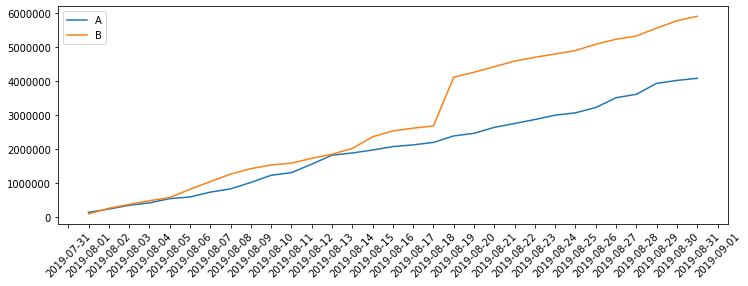

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulative_orders_A['date'], cummulative_orders_A['revenue'], label='A')
plt.plot(cummulative_orders_B['date'], cummulative_orders_B['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
from matplotlib import dates
#Установим локатор для главных меток
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))

Впервые дни теста выручка групп имела близкие значения, однако к середине теста группа B вырвалась вперед, а через 20 дней с момента начала тестирования произошёл резкий скачок в группе B, и она продолжала лидировать с таким отрывом до конца теста. Это похоже на выброс аномального значения, который надо будет исследовать в дальнейших этапах анализа.

#### Кумулятивный средний чек по группам

Cредний чек- сумма денег деленная на уникальных покупателей за определенный период времени. 

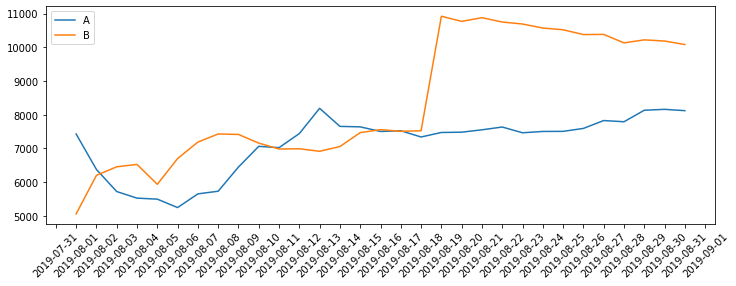

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulative_orders_A['date'], cummulative_orders_A['revenue']/cummulative_orders_A['visitorId'], label='A')
plt.plot(cummulative_orders_B['date'], cummulative_orders_B['revenue']/cummulative_orders_B['visitorId'], label='B')
plt.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))

Видно что в течении первой половины теста средний чек для каждой группы претерпевал скачки, что говорит о вкладе аномальных значений, ближе к концу теста средний чек претерпивает слабый рост в группе A, и спад значения после большого скачка в группе B.Скорее всего, принимать решение по этой метрике рано, либо необходимо сделать дополнительный анализ выбросов, которые так сильно искажают результаты.

#### Относительные изменения кумулятивного среднего чека группы B к группе A

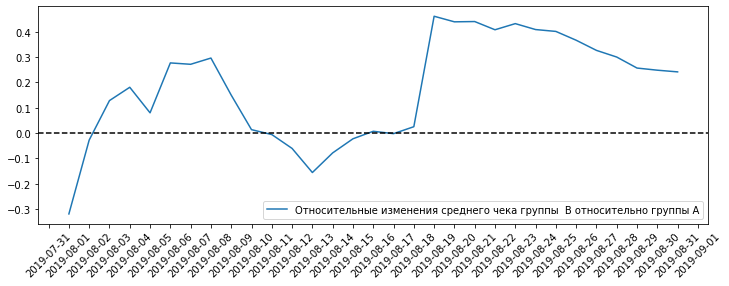

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulative_orders_A['date'], ((cummulative_orders_B['revenue']/cummulative_orders_B['visitorId'])/(cummulative_orders_A['revenue']/cummulative_orders_A['visitorId'])-1), label='Относительные изменения среднего чека группы  B относительно группы A')
plt.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
#Добавим горизонтальную ось методом axhline()
plt.axhline(y=0, color='black', linestyle='--')

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы. Тяжело сказать с уверенностью , что группа B имеет превосходство.

#### Кумулятивная конверсия по группам

In [19]:
#найдем для группы A кумулятивные данные количества пользователей в указанную дату в указанной группе A/B-теста
cummulative_visitors_A= date_group.apply(
lambda x: visits[(visits['date'] <= x['date'])  & (visits['group'] == x['group_A'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1)
#объединяемы кумулятивные датасеты с заказами и пользователями для группы A 
cummulativeDataA = cummulative_orders_A.merge(cummulative_visitors_A, left_on=['date', 'group'], right_on=['date', 'group'])
#переименуем столбцы для удобства работы
cummulativeDataA.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeDataA['conversion'] = cummulativeDataA['orders']/cummulativeDataA['visitors']
cummulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-02,A,44,38,242401,1338,0.032885
2,2019-08-03,A,68,62,354874,1845,0.036856
3,2019-08-04,A,84,77,425699,2562,0.032787
4,2019-08-05,A,109,100,549917,3318,0.032851


In [20]:
#аналогично рассчитаем конверсию для группы B
cummulative_visitors_B= date_group.apply(
lambda x: visits[(visits['date'] <= x['date'])  & (visits['group'] == x['group_B'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1)
#объединяемы кумулятивные датасеты с заказами и пользователями для группы A 
cummulativeDataB = cummulative_orders_B.merge(cummulative_visitors_B, left_on=['date', 'group'], right_on=['date', 'group'])
#переименуем столбцы для удобства работы
cummulativeDataB.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeDataB['conversion'] = cummulativeDataB['orders']/cummulativeDataB['visitors']
cummulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,B,21,20,101217,713,0.029453
1,2019-08-02,B,45,43,266748,1294,0.034776
2,2019-08-03,B,61,59,380996,1803,0.033833
3,2019-08-04,B,78,75,489567,2573,0.030315
4,2019-08-05,B,101,98,581995,3280,0.030793


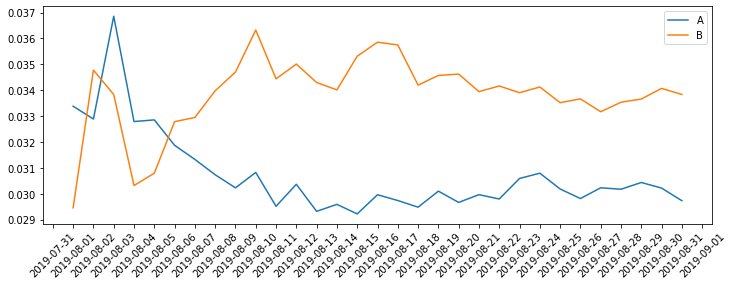

In [21]:
#построим график конверсий без масштаба осей
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))

Кажется что значения не устоконялись вплоть до конца теста , до сих пор наблюдаются скачки. Однако если построить график в относительных величинах, то картина заметно измениться.

['2019-08-01', '2019-08-31', 0, 0.05]

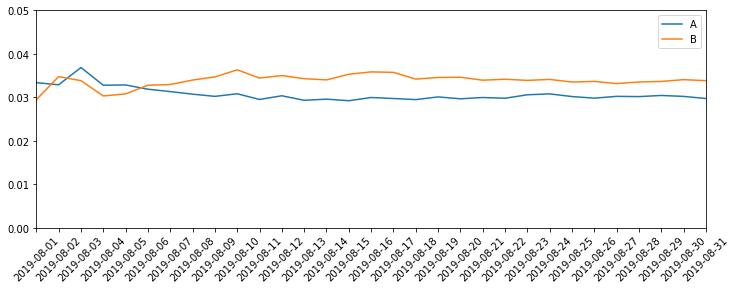

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

В начале теста сегмент A имел большую конверсию, но постепенно происходил спад  конверсии в группе A и рост  её в группе B. К концу теста егмент B выровнялся и зафикировался примерно около одного значения, больше значения сегмента A.
Масштаб графика выбран таким, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: около 1%. В относительных величинах — это много. Поэтому, если убрать масштаб осей, как на верхнем графике , будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения.

#### Относительные изменения кумулятивной конверсии группы B к группе A

['2019-08-01', '2019-08-31', -0.3, 0.3]

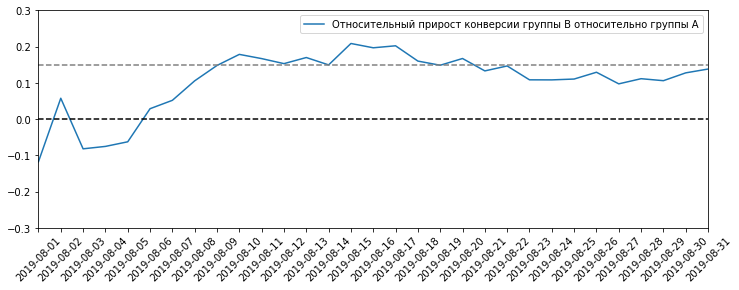

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(cummulativeDataB['date'], (cummulativeDataB['conversion']/cummulativeDataA['conversion']-1), label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])

Почти с самого начала теста группа B лидирует по конверсии за исключением выбросов в первые дни. Максимальный прирост в 20% относительно группы A достигается в середине теста, а после спада к концу тестирования прирост фиксируется около значения в 15% относительно группы A.

#### Количества заказов по пользователям

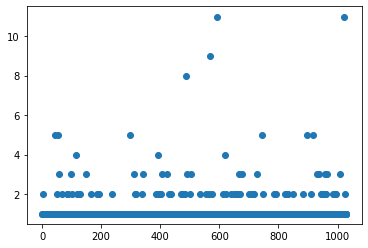

In [24]:
#выделим из таблицы orders только айди заказов и покупателей. Сгруппируем данные по айди покупателя и посчитаем количество заказов для каждого из них
ordersByUsers=orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
#Оценим количество заказов , построив график рассеяния точек методом scatter
plt.scatter( pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders'])

Многие пользователи совершают один либо два заказа.Большие значения скорее всего аномальные, для подтверждения данной теории рассчитаем перцентели.

#### Граница для определения аномальных пользователей

In [25]:
#для определния границ испольуем метод библиотеки numpy percentile()
import numpy as np
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Только 5% пользователей совершают больше двух заказов, и лишь 1% делает больше четырёх. Выберем два заказа на одного пользователя за нижнюю границу числа заказов, и отсеем в дальнейшей аномальных пользователей по ней.

#### Стоимость заказов

(0, 75000)

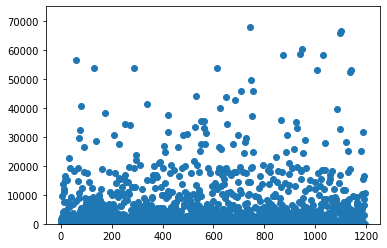

In [26]:
#Оценим стоимость заказов , построив график рассеяния методом scatter
plt.scatter( pd.Series(range(0,len(orders))), orders['revenue'])
plt.ylim(0,75000)

Видно,что есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 30000 рублей. 

#### Граница для определения аномальных заказов

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58 233 рубля. Так как принято отсеивать от 1% до 5% заказов. Выберем за границу стоимость 30000 рублей.

#### Различия в конверсии между группами по «сырым» данным

Нужно посчитайте статистическую значимость различий в конверсии между группами по неочищенным данным. Для этого применим не параметрический тест Манна-Уитни к распределнию количества заказов на одного пользователя.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. А затем создадим выборку по по каждой в группе в которые на каждого пользователя будет указано число заказов, а для тех кто этого не делал подставим 0.

In [28]:
ordersByUsersA=orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
#считаем число всех посещений
visitsA= visits[visits['group']=='A'][['visitors']]
#чтобы найти количество пользователей что вообще не делали заказы, нужно вычесть из числа всех посетителей магазина
#количество тех, кто сделал заказ , и затем заполняем  0 их количество заказов 
zero_orders_A=pd.Series(0, index=np.arange(visitsA['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')
#и наконец , применяя метод pd.concat([], axis=0),  объеденим эти две серии в единую запись для проведения непосредственного стат. теста
sample_conversion_A= pd.concat([ordersByUsersA['orders'],zero_orders_A],axis=0)

In [29]:
ordersByUsersB=orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
#считаем число всех посещений
visitsB= visits[visits['group']=='B'][['visitors']]
#чтобы найти количество пользователей что вообще не делали заказы, нужно вычесть из числа всех посетителей магазина
#количество тех, кто сделал заказ , и затем заполняем  0 их количество заказов 
zero_orders_B=pd.Series(0, index=np.arange(visitsB['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')
#и наконец , применяя метод pd.concat([], axis=0),  объеденим эти две серии в единую запись для проведения непосредственного стат. теста
sample_conversion_B=pd.concat([ordersByUsersB['orders'],zero_orders_B],axis=0)

In [30]:
import scipy.stats as stats
#применяем тест Манна-Уитни, p-value будет под индексом 1
print("{0:.4f}".format(stats.mannwhitneyu(sample_conversion_A, sample_conversion_B)[1]))
#Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей—найдём среднее в выборке sampleA методом mean
#Аналогично найдём конверсию группы B: SampleB.mean().
print("{0:.3f}".format(sample_conversion_B.mean()/sample_conversion_A.mean()-1))

0.0084
0.138


p-value = 0.0084, оно меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Причём относительный выигрыш группы B равен 13.8%.

#### Различия в среднем чеке заказа между группами по «сырым» данным

In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


p-value = 0.365, что сильно много по сравнению с 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в средних чеках между группами нет, нельзя отвергнуть. Однако относительный выигрыш группы B равен почти 26%. Скорее всего это влияния аномалий. Сравним теперь с "очищенными" данными.

#### Различия в конверсии между группами по «очищенным» данным

Для началы выделим группу пользователей с аномальными значениями по количеству заказов и выручки. 

In [32]:
#находим айди всех пользователей, что совершили слишком много заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
#находим айди всех пользователей, что совершили дорогие заказы
usersWithManyrevenue = orders[orders['revenue']>30000]['visitorId']
#объединяем в единую серию аномальных айди, и выбрасим дубликаты из неё
abnormalUsers = pd.concat([usersWithManyOrders, usersWithManyrevenue], axis = 0).drop_duplicates().sort_values()

Теперь узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Подготовим выборки количества заказов по пользователям по группам теста, применяем метод логического отрицания для выбора айди np.logical_not()

In [33]:
filter_sample_conversion_A= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitsA['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
filter_sample_conversion_B= pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitsB['visitors'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [34]:
print('{0:.4f}'.format(stats.mannwhitneyu(filter_sample_conversion_A, filter_sample_conversion_B)[1]))
print("{0:.3f}".format(filter_sample_conversion_B.mean()/filter_sample_conversion_A.mean()-1))

0.0067
0.172


p-value = 0.0067, оно меньше 0.05. Значит, нулевую гипотезу для отфильтрованных групп также отвергаем. Статистическая значимость уменьшилась, но совсем не значительно. Однако относительный выигрыш группы B вырос почти на 3,5%: вместо 13.8% стал 17,2% .

#### Различия в среднем чеке заказа между группами по «очищенным» данным

In [35]:
print("{0:.3f}".format(
    stats.mannwhitneyu(
        orders[np.logical_and(
            orders['group']=='A' ,
            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], 
        orders[np.logical_and(
            orders['group']=='B', 
            np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print("{0:.3f}".format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A' ,np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

0.360
-0.023


Опять же статистическая значимость не сильно изменилась: с 0.365 упала до 0.36. А вот относительный выигрыш группы B по среднему чеку очень поменялся: с выиграша в 26% упал до оставания в 2,3% . 

In [43]:
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].sum()

2923121

In [44]:
orders[np.logical_and(orders['group']=='A' ,np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].sum()

2529855

### Вывод по A/B тесту 

Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
График различия конверсии между группами сообщает, что результаты группы A хуже группы B почти на 15%, а по относительным отфильтрованным данным в среднем прирост составил 17,2%;
График различия среднего чека говорит о том, что результаты группы B не стабильны, однако вместе  с аномальными данными наблюдался прирост около 20%, но по относительным отфильтрованным данным в среднем  произошел спад среднего чека в 2%;

Таким образом, исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Посетители, которые перешли в статус покупателей, стало большей, и не смотря на то что средний чек не только не вырос, он даже упал на 2%, суммарная выручка компании увеличилась. 